Non-linear Models:

Try non-linear models such as decision trees, random forests, gradient boosting, or support vector machines.
Non-linear models can capture complex relationships that linear models might miss.

Combine predictions from multiple models using ensemble methods like bagging (e.g., Random Forests) or boosting (e.g., Gradient Boosting).
Ensemble methods can often improve performance over individual models.

# DECISION TREE

In [38]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/10_feature_extraction.csv")
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1
0,1,0,1,1,0,202500.0,406597.5,24700.5,6,3,...,0.139376,1,0,0,0.0,0.0,0.0,0.0,1.0,8
1,0,0,0,0,0,270000.0,1293502.5,35698.5,1,2,...,0.586819,1,0,0,0.0,0.0,0.0,0.0,0.0,3
2,0,1,1,1,0,67500.0,135000.0,6750.0,6,3,...,0.729567,0,0,0,0.0,0.0,0.0,0.0,0.0,8
3,0,0,0,1,0,135000.0,312682.5,29686.5,6,3,...,0.519243,1,0,0,0.0,0.0,0.0,0.0,0.5,8
4,0,0,1,1,0,121500.0,513000.0,21865.5,6,3,...,0.581112,0,0,1,0.0,0.0,0.0,0.0,0.0,3


In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

In [ ]:
X=df.drop("TARGET",axis=1)
y=df["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [19]:

X=X_train_resampled
y=y_train_resampled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
dt_classifier = DecisionTreeClassifier(random_state=42)
num_features_to_select = 14
rfe = RFE(estimator=dt_classifier, n_features_to_select=num_features_to_select)

In [21]:
X_train_rfe = rfe.fit_transform(X_train, y_train)

In [22]:
dt_classifier.fit(X_train_rfe, y_train)

# Make predictions on the test set using the selected features
X_test_rfe = rfe.transform(X_test)
y_pred = dt_classifier.predict(X_test_rfe)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with RFE-selected features: {accuracy}")

Accuracy with RFE-selected features: 0.8534243983002735


In [24]:
from sklearn.metrics import classification_report

print("testing")
print(classification_report(y_pred,y_test))

testing
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     43943
           1       0.71      0.68      0.69     14184

    accuracy                           0.85     58127
   macro avg       0.80      0.79      0.80     58127
weighted avg       0.85      0.85      0.85     58127



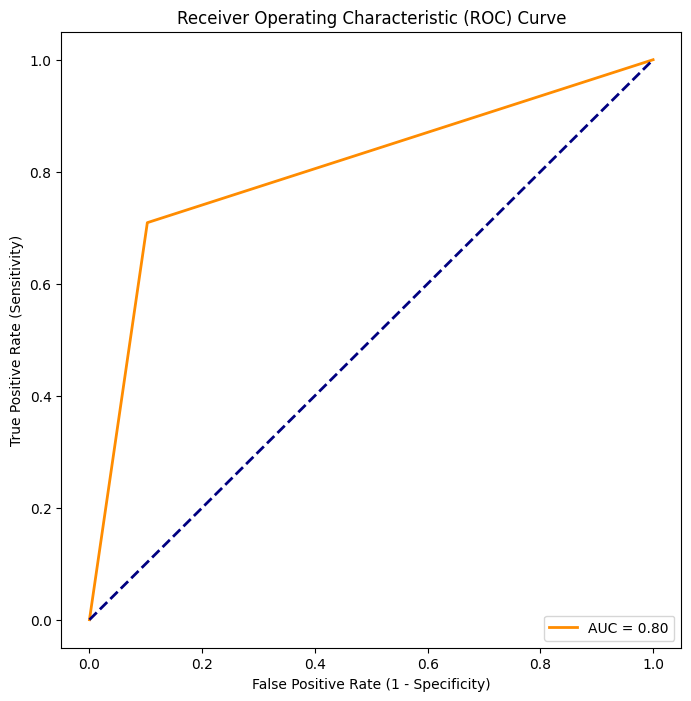

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# RANDOM FOREST

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report

In [30]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [31]:
rf_classifier.fit(X_train_rfe, y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred = rf_classifier.predict(X_test_rfe)


In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     44579
           1       0.99      0.68      0.81     13548

    accuracy                           0.92     58127
   macro avg       0.95      0.84      0.88     58127
weighted avg       0.93      0.92      0.92     58127



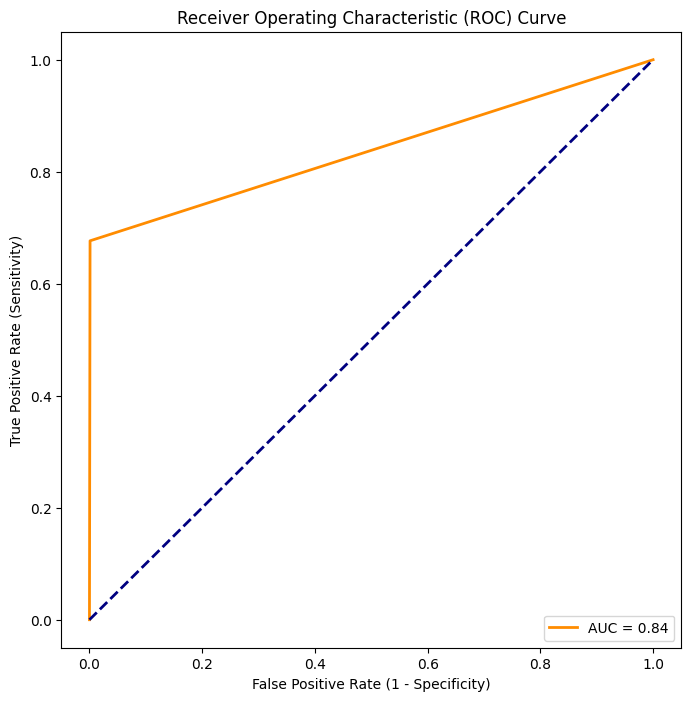

In [34]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# ADABOOST